In [50]:
# importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2  # package name opencv
# version of Tensorflow
print(tf.__version__)

# To avoid Kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


2.15.0


In [51]:
# Check if you have a GPU
import warnings

if not tf.test.gpu_device_name():
    warnings.warn('No GPU found')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

# If a GPU is found, it will say: "Default GPU Device: /device:GPU:0"


C:\Users\AVMI\AppData\Local\Temp\ipykernel_26104\2096368165.py:5: UserWarning: No GPU found
  warnings.warn('No GPU found')


In [112]:
img_dir = 'PetImages'  # Folder where images are stored
training_data= []
IMG_SIZE =128

# Read the training images into the list 'training_data'     
for category in ["Dog", "Cat"]:
    path = os.path.join(img_dir, category)
    class_num = ["Dog", "Cat"].index(category)
    for img in os.listdir(path):
        try:
            temp_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.cvtColor(temp_array, cv2.COLOR_BGR2RGB)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num]) # add image and label to list
        except Exception as e:
            pass

In [113]:
# printing the number of images in the training set
print('Number of images in the training set:', len(training_data))    # 24946

Number of images in the training set: 23475


In [114]:
# Count number of dogs and cats in the training set
num_cats = 0
num_dogs = 0

for feature, label in training_data:
    if label == 0:
        num_dogs += 1
    else:
        num_cats += 1
        
print('number of dogs photos', num_dogs)  # 12470
print('number of cats photos', num_cats)    # 12476

number of dogs photos 12470
number of cats photos 11005


In [115]:
# Shuffle the images in the training set
import random
random.shuffle(training_data)

# Show sample of the labels after the shuffle
for sample in training_data[:10]:
    print(sample[1], end=' ')
# 1 0 0 0 0 1 0 1 1 0

# Examine the first element in the list training_data
print(training_data[0])
print(training_data[0][0].shape)
print(training_data[0][1])

1 1 1 1 0 0 0 0 1 1 [array([[[250, 249, 254],
        [251, 250, 255],
        [252, 251, 255],
        ...,
        [ 27,  20,  10],
        [ 28,  21,  11],
        [ 29,  22,  12]],

       [[250, 249, 254],
        [251, 250, 255],
        [252, 251, 255],
        ...,
        [ 28,  21,  13],
        [ 28,  21,  13],
        [ 30,  23,  15]],

       [[250, 249, 254],
        [251, 250, 255],
        [252, 251, 255],
        ...,
        [ 31,  24,  16],
        [ 29,  22,  14],
        [ 30,  23,  15]],

       ...,

       [[219, 202, 194],
        [220, 203, 196],
        [220, 202, 197],
        ...,
        [201, 184, 181],
        [195, 178, 177],
        [190, 173, 172]],

       [[219, 202, 194],
        [219, 202, 195],
        [220, 202, 198],
        ...,
        [158, 139, 142],
        [157, 138, 141],
        [155, 136, 141]],

       [[218, 201, 194],
        [217, 200, 193],
        [217, 199, 195],
        ...,
        [139, 119, 126],
        [139, 120, 127],
   

In [116]:
# Separate the images from the label and save in the lists X and y

X = []; y = []  # X and y are empty lists
for features, label in training_data:
    X.append(features)
    y.append(label)

In [117]:
#  Convert X into an array and reshape it into 4-dimensions : 
# Number of images, image width, image height, channels    
IMG_SIZE = 128
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Show dimensions of the arrays X and y
print(X.shape[1:])      
# (24946, 70, 70, 1)

(128, 128, 3)


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42) 

In [119]:
type(X_test)

numpy.ndarray

In [120]:
type(y_test)

list

In [121]:
len(X_test)

4695

In [122]:
X_test.shape[1:]

(128, 128, 3)

In [123]:
X_test[9].shape[0:]

(128, 128, 3)

In [124]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

# Defining the model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
# model=Sequential()
# model.add(Conv2D(32,(3,3),activation='relu',input_shape=(70, 70, 1)))#(Image_Width,Image_Height,Image_Channels)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(128,(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='categorical_crossentropy',
#   optimizer='rmsprop',metrics=['accuracy'])

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
#model.add(Dense(2,activation='softmax'))

# model = tensorflow.keras.models.Sequential()
# model.add(tensorflow.keras.layers.Conv2D(96, (3,3), input_shape=X.shape[1:]))
# model.add(tensorflow.keras.layers.Activation('relu'))
# model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(tensorflow.keras.layers.Conv2D(64, (3,3)))
# model.add(tensorflow.keras.layers.Activation('relu'))
# model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(tensorflow.keras.layers.Conv2D(32, (3,3)))
# model.add(tensorflow.keras.layers.Activation('relu'))
# model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(tensorflow.keras.layers.Conv2D(32, (3,3)))
# model.add(tensorflow.keras.layers.Activation('relu'))
# model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)))

# model.add(tensorflow.keras.layers.Flatten())
# model.add(tensorflow.keras.layers.Dense(32))
# model.add(tensorflow.keras.layers.Activation('relu'))
# model.add(tensorflow.keras.layers.Dense(1))
# model.add(tensorflow.keras.layers.Activation('sigmoid'))   

print(model.summary())


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_28 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_29 (Ba  (None, 61, 61, 64)      

In [125]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=["accuracy"])
# Convert y from a list into an array
y_train = np.array(y_train)

# Measure time it takes to fit the model
import time
start_time = time.time()

history = model.fit(X_train, y_train, batch_size=128, epochs=15, validation_split=0.30)

end_time = time.time()
duration = end_time - start_time
print('duration =', duration)

Epoch 1/15
103/103 [==============================] - 101s 974ms/step - loss: 0.7742 - accuracy: 0.6466 - val_loss: 0.6467 - val_accuracy: 0.6706
Epoch 2/15
103/103 [==============================] - 99s 961ms/step - loss: 0.5591 - accuracy: 0.7314 - val_loss: 0.6093 - val_accuracy: 0.6729
Epoch 3/15
103/103 [==============================] - 105s 1s/step - loss: 0.4580 - accuracy: 0.7913 - val_loss: 0.4805 - val_accuracy: 0.7693
Epoch 4/15
103/103 [==============================] - 100s 966ms/step - loss: 0.3784 - accuracy: 0.8315 - val_loss: 0.6112 - val_accuracy: 0.6837
Epoch 5/15
103/103 [==============================] - 99s 966ms/step - loss: 0.3235 - accuracy: 0.8622 - val_loss: 0.6678 - val_accuracy: 0.7016
Epoch 6/15
103/103 [==============================] - 107s 1s/step - loss: 0.2718 - accuracy: 0.8858 - val_loss: 0.6514 - val_accuracy: 0.7215
Epoch 7/15
103/103 [==============================] - 100s 972ms/step - loss: 0.2107 - accuracy: 0.9139 - val_loss: 0.3890 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


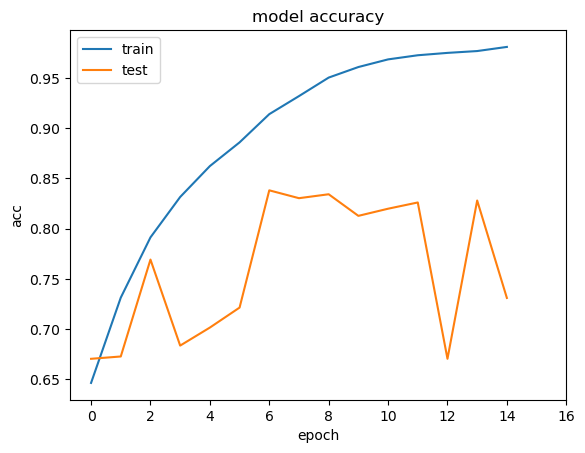

In [129]:
# Data collected in history
print(history.history.keys())
# dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

# Plot of accuracy as a function of epoch during training
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
x_ticks = list(range(0,18,2))
plt.xticks(x_ticks)
plt.show()

In [127]:
# Saving the model to the disk
model.save('CNN-Cats_and_Dogs')

INFO:tensorflow:Assets written to: CNN-Cats_and_Dogs\assets


INFO:tensorflow:Assets written to: CNN-Cats_and_Dogs\assets


In [128]:
# Using the Model to make Predictions
model = tf.keras.models.load_model('CNN-Cats_and_Dogs')

In [133]:
y_test = np.array(y_test)
loss, accuracy = model.evaluate(X_test, y_test)

147/147 [==============================] - 7s 49ms/step - loss: 1.4996 - accuracy: 0.7289


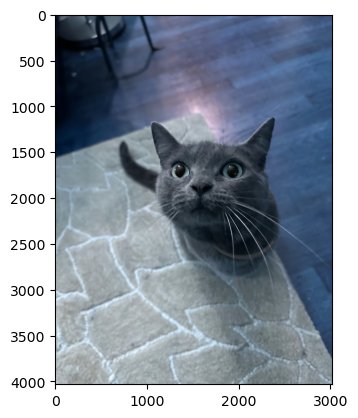

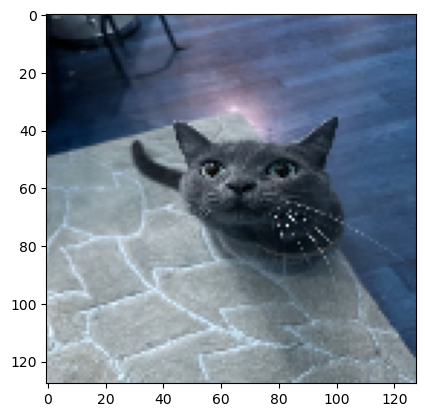

1/1 [==============================] - 0s 117ms/step
Prediction: Cat
Prediction Probability: 99.2249608039856%


In [134]:
# Prepare the image for making a prediction
IMG_SIZE = 128 # image size
img_array = cv2.imread('image.jpg') # convert image to gray scale
plt.imshow(img_array)
plt.show()
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
plt.imshow(new_array)
plt.show()
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) # adjust dimensions
prediction1 = model.predict(an_image)
print(["Prediction: Dog", "Prediction: Cat"][int(round(prediction1[0][0]))])
print("Prediction Probability: " + str(abs(100 -(prediction1[0][0])*100/0.5)) + "%")

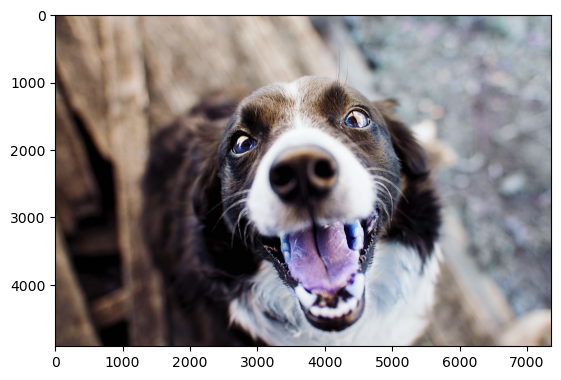

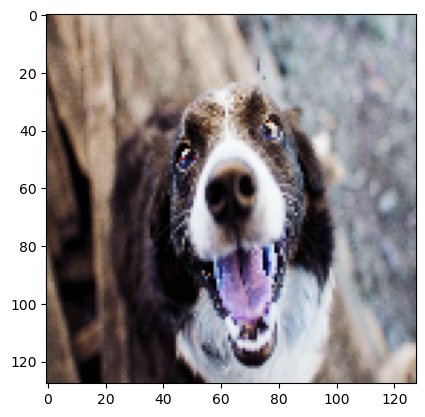

1/1 [==============================] - 0s 44ms/step
Prediction: Dog
Prediction Probability: 99.36526166275144%


In [136]:
# Prepare the image for making a prediction
IMG_SIZE = 128 # image size
img_array = cv2.imread('dog-image.jpg') # convert image to gray scale
plt.imshow(img_array)
plt.show()
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize image
plt.imshow(new_array)
plt.show()
an_image = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) # adjust dimensions
prediction1 = model.predict(an_image)
print(["Prediction: Dog", "Prediction: Cat"][int(round(prediction1[0][0]))])
print("Prediction Probability: " + str(abs(100 -(prediction1[0][0])*100/0.5)) + "%")